In [20]:
import jax
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp


In [21]:
from funciones import scalar_rayleigh_sommerfeld, scalar_ASM

In [22]:
import numpy as np
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)

um, nm, mm, cm = 1, 0.001, 1000, 10000

Nx,Ny = 2048, 2048
λ = 632.8 * nm
extent_x, extent_y =5.* mm, 5.* mm
dx,dy = extent_x/Nx, extent_y/Ny
x,y = dx*(jnp.arange(Nx)-Nx//2), dy*(jnp.arange(Ny)-Ny//2)
xx, yy = jnp.meshgrid(x, y)

def add_rectangular_slit(xx,yy, width, height, x0, y0):
    return jnp.where((((xx >= (x0 - width / 2)) & (xx < (x0 + width / 2)))
                        & ((yy >= (y0 - height / 2)) & (yy < (y0 + height / 2)))),
                        jnp.ones_like(xx), jnp.zeros_like(xx))

D = 0.15 * mm  #slits separation
width = 0.05*mm #slit width
height = 0.23*mm #slit height

U = (add_rectangular_slit(xx,yy, width, height, x0 =  -D/2, y0 = 0) 
    + add_rectangular_slit(xx,yy, width, height, x0 = D/2, y0 = 0))

N_eval = 1000 # number of points to evaluate the Rayleigh Sommerfeld integral
x_eval,y_eval = jnp.linspace(-500,500, N_eval),  jnp.array([yy[Ny//2 , 0]]*N_eval)


z = 0.5*cm # propagation distance

U_RS = scalar_rayleigh_sommerfeld(x, y, U, x_eval, y_eval, z, λ)
U_ASM = scalar_ASM(x, y, U, z, λ)[Ny//2, :]



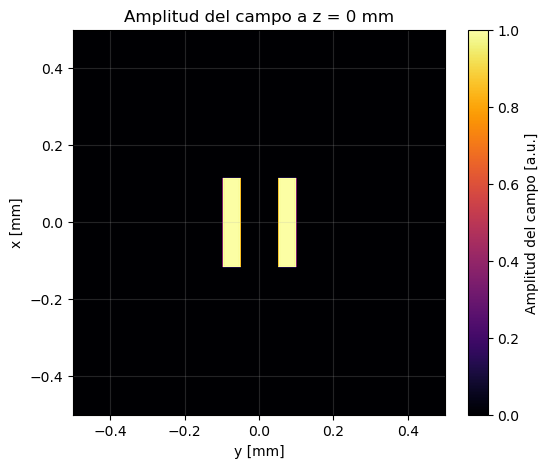

In [23]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(1,1,1)  
ax.set_ylabel("x [mm]")
ax.set_xlabel('y [mm]')
ax.set_title("Amplitud del campo a z = 0 mm")

ax.grid(alpha =0.2)
im = ax.imshow(U, interpolation = 'spline36', origin = 'lower', cmap = 'inferno', extent = [x[0]/mm, x[-1]/mm ,y[0]/mm, y[-1]/mm ], aspect = 'auto')
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,0.5])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label('Amplitud del campo [a.u.]')

plt.show()


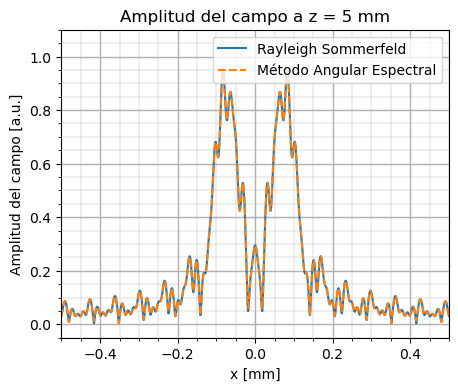

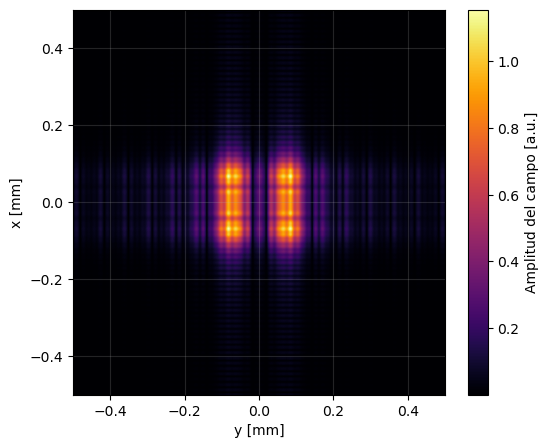

In [24]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)  

ax.plot(x_eval/mm, np.abs(U_RS), '-',label ='Rayleigh Sommerfeld')
#ax.plot(x_eval,jnp.abs(E02_exact), '-o',label ='fresnel 02 exact' , alpha = 0.5)

ax.plot(xx[Ny//2,:]/mm, np.abs(U_ASM), '--',label ='Método Angular Espectral')
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.05,1.1])

ax.set_xlabel("x [mm]")
ax.set_ylabel("Amplitud del campo [a.u.]")
ax.set_title("Amplitud del campo a z = 5 mm")


ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=1.0)
ax.grid(which='minor', linestyle='-', linewidth=0.3)

plt.legend()
plt.show()


fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(1,1,1)  
ax.set_ylabel("x [mm]")
ax.set_xlabel('y [mm]')

ax.grid(alpha =0.2)
im = ax.imshow(np.abs(scalar_ASM(x, y, U, z, λ)), interpolation = 'spline36', origin = 'lower', cmap = 'inferno', extent = [x[0]/mm, x[-1]/mm ,y[0]/mm, y[-1]/mm ], aspect = 'auto')
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,0.5])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label('Amplitud del campo [a.u.]')

plt.show()

In [15]:
z = 2.5*cm # propagation distance

U_RS = scalar_rayleigh_sommerfeld(x, y, U, x_eval, y_eval, z, λ)
U_ASM = scalar_ASM(x, y, U, z, λ)[Ny//2, :]



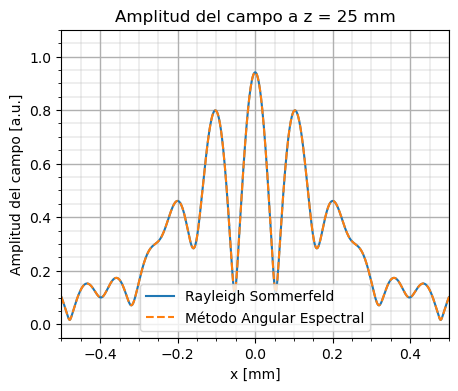

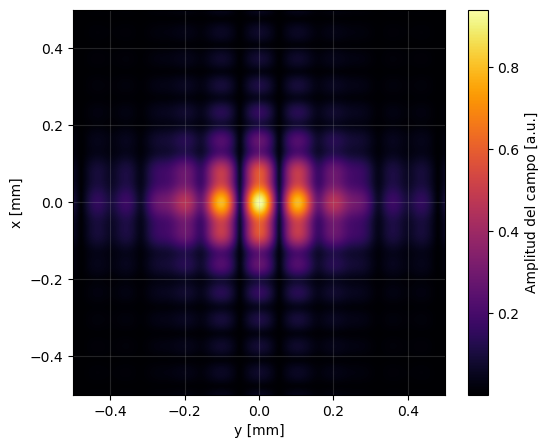

In [18]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)  

ax.plot(x_eval/mm, np.abs(U_RS), '-',label ='Rayleigh Sommerfeld')
#ax.plot(x_eval,jnp.abs(E02_exact), '-o',label ='fresnel 02 exact' , alpha = 0.5)

ax.plot(xx[Ny//2,:]/mm, np.abs(U_ASM), '--',label ='Método Angular Espectral')
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.05,1.1])

ax.set_xlabel("x [mm]")
ax.set_ylabel("Amplitud del campo [a.u.]")
ax.set_title("Amplitud del campo a z = 25 mm")


ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=1.0)
ax.grid(which='minor', linestyle='-', linewidth=0.3)

plt.legend()
plt.show()


fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(1,1,1)  
ax.set_ylabel("x [mm]")
ax.set_xlabel('y [mm]')

ax.grid(alpha =0.2)
im = ax.imshow(np.abs(scalar_ASM(x, y, U, z, λ)), interpolation = 'spline36', origin = 'lower', cmap = 'inferno', extent = [x[0]/mm, x[-1]/mm ,y[0]/mm, y[-1]/mm ], aspect = 'auto')
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,0.5])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label('Amplitud del campo [a.u.]')

plt.show()